In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [35]:
def absolute_time(df):
    wall = df['Wall time']
    start = wall.loc[0]
    return (df['Wall time'] - start).astype('timedelta64[s]')


df_add = pd.read_csv('./run-add_train-tag-epoch_root_mean_squared_error.csv')
df_base = pd.read_csv('./run-base_train-tag-epoch_root_mean_squared_error.csv')
df_concat = pd.read_csv('./run-concat_train-tag-epoch_root_mean_squared_error.csv')

dfs = [df_add, df_base, df_concat]

for df in dfs:
    df['Wall time'] = pd.to_datetime(df['Wall time'], unit='s')
    df['Absolute time'] = absolute_time(df)
df_add

Wall time  Step     Value  Absolute time
0  2022-12-30 10:34:34.165750016     0  0.099593            0.0
1  2022-12-30 10:36:36.865926912     1  0.073661          122.0
2  2022-12-30 10:38:40.181992960     2  0.070250          246.0
3  2022-12-30 10:40:43.159077888     3  0.060504          368.0
4  2022-12-30 10:42:46.205758208     4  0.066478          492.0
..                           ...   ...       ...            ...
82 2022-12-30 13:23:32.812508160    82  0.025519        10138.0
83 2022-12-30 13:25:35.771958016    83  0.025785        10261.0
84 2022-12-30 13:27:38.413584896    84  0.026490        10384.0
85 2022-12-30 13:29:41.538906112    85  0.025754        10507.0
86 2022-12-30 13:31:44.426362880    86  0.026909        10630.0

[87 rows x 4 columns]

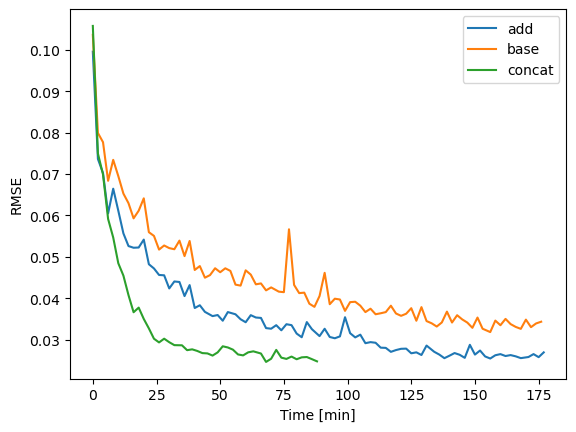

In [31]:
kwargs = {
    'x': 'Absolute time',
    'y': 'Value',
    'ylabel': 'RMSE',
    'xlabel': 'Time [min]',
}

fig, ax = plt.subplots()
df_add.plot(label='add', ax=ax, **kwargs)
df_base.plot(label='base', ax=ax, **kwargs)
df_concat.plot(label='concat', ax=ax, **kwargs)
plt.savefig('time.pdf')

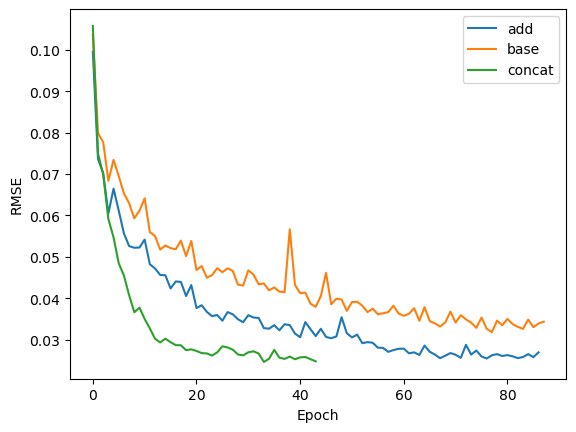

In [30]:
kwargs = {
    'x': 'Step',
    'y': 'Value',
    'ylabel': 'RMSE',
    'xlabel': 'Epoch',
}

fig, ax = plt.subplots()
df_add.plot(label='add', ax=ax, **kwargs)
df_base.plot(label='base', ax=ax, **kwargs)
df_concat.plot(label='concat', ax=ax, **kwargs)
plt.savefig('epochs.pdf')

In [41]:
df_add['Absolute time'].diff().mean()

123.6046511627907

In [42]:
df_base['Absolute time'].diff().mean()

121.54022988505747

In [43]:
df_concat['Absolute time'].diff().mean()

124.16279069767442